<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\l'
<>:69: SyntaxWarning: invalid escape sequence '\l'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\l'
<>:69: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2632644329.py:54: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda ($\mu$m)', fontsize=14)
/tmp/ipython-input-2632644329.py:55: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('Radiância Espectral ($B_{\lambda}$) Arbitrária', fontsize=14)
/tmp/ipython-input-2632644329.py:69: SyntaxWarning: invalid escape sequence '\l'
  f'$\lambda_{{max}}$', color='gray', fontsize=10)


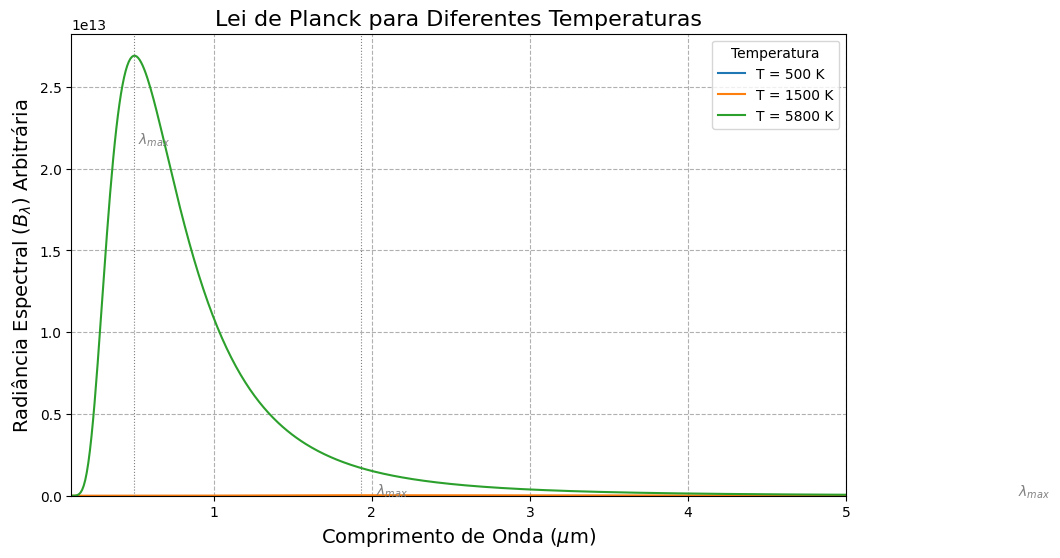


--- Intensidade Total (Lei de Stefan-Boltzmann) ---
Para T = 500 K: Intensidade Total (I) = 3.54e+03 W/m²
Para T = 1500 K: Intensidade Total (I) = 2.87e+05 W/m²
Para T = 5800 K: Intensidade Total (I) = 6.42e+07 W/m²


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definir Constantes Físicas ---
h = 6.626e-34  # Constante de Planck (J·s)
c = 2.998e8    # Velocidade da Luz (m/s)
k = 1.381e-23  # Constante de Boltzmann (J/K)

# --- 2. Função da Lei de Planck ---
def planck_law(wavelength, T):
    """
    Calcula a radiância espectral (B) da Lei de Planck para um dado
    comprimento de onda e temperatura.

    Args:
        wavelength (array): Comprimento de onda em metros.
        T (float): Temperatura absoluta em Kelvin.

    Returns:
        array: Radiância espectral em W/(m^3·sr).
    """
    # Evita divisão por zero ou exponenciais muito grandes/pequenas
    if T <= 0:
        return np.zeros_like(wavelength)

    # Parte 1: 2 * h * c^2 / lambda^5
    term1 = (2 * h * c**2) / (wavelength**5)

    # Parte 2: (e^(hc/lambda*k*T) - 1)^-1
    # Argumento do exponencial (hc/lambda*k*T)
    exponent_arg = (h * c) / (wavelength * k * T)
    term2 = 1.0 / (np.exp(exponent_arg) - 1.0)

    return term1 * term2

# --- 3. Definir Parâmetros de Simulação ---

# Temperaturas a serem simuladas (em Kelvin)
temperatures = [
    500,     # Exemplo de emissão de objeto aquecido (quase totalmente IR)
    1500,    # Exemplo de objeto incandescente
    5800     # Aproximadamente a temperatura da superfície do Sol
]

# Faixa de Comprimentos de Onda (de 0.1 µm até 5 µm)
# Convertendo de micrómetros (µm) para metros (m) para os cálculos
wavelengths_um = np.linspace(0.1, 5.0, 500)
wavelengths_m = wavelengths_um * 1e-6

# --- 4. Calcular e Plotar ---

plt.figure(figsize=(10, 6))
plt.title('Lei de Planck para Diferentes Temperaturas', fontsize=16)
plt.xlabel('Comprimento de Onda ($\mu$m)', fontsize=14)
plt.ylabel('Radiância Espectral ($B_{\lambda}$) Arbitrária', fontsize=14)
plt.grid(True, linestyle='--')

for T in temperatures:
    # Calcular os valores da radiância
    radiance = planck_law(wavelengths_m, T)

    # Plotar a curva para a temperatura atual
    plt.plot(wavelengths_um, radiance, label=f'T = {T} K')

    # Encontrar o pico (Lei de Wien) para fins de anotação
    lambda_max_um = (2.898e-3 / T) * 1e6 # Cálculo da Lei de Wien (convertido para µm)
    plt.axvline(x=lambda_max_um, color='gray', linestyle=':', linewidth=0.8)
    plt.text(lambda_max_um * 1.05, np.max(radiance) * 0.8,
             f'$\lambda_{{max}}$', color='gray', fontsize=10)


plt.legend(title='Temperatura', loc='upper right')
plt.xlim(0.1, 5.0) # Limita o eixo X para melhor visualização
plt.ylim(0) # Começa o eixo Y em zero
plt.show()

# --- 5. Cálculo Extra: Intensidade Total (Lei de Stefan-Boltzmann) ---
# A intensidade total (I) é a integral sob a curva.
sigma = 5.670e-8 # Constante de Stefan-Boltzmann (W/m^2·K^4)
print("\n--- Intensidade Total (Lei de Stefan-Boltzmann) ---")
for T in temperatures:
    I = sigma * T**4
    print(f'Para T = {T} K: Intensidade Total (I) = {I:.2e} W/m²')